Лабораторная работа 5 (для защиты)

Вставить в сцену с объект  по варианту из защиты предшествующих ЛР 

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [51]:
def plot_verticles(vertices, isosurf = False, filename = None):
    # Create a new plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    z = [v[2] for v in vertices]    
    if isosurf:
        ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
    else:
        ax.scatter(x, y, z, c='r', marker='o')    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # Show or save the plot
    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)


def plot_mesh(
    your_mesh, 
    size_x=10, 
    size_y=10, 
    dpi=80, 
    filename = None
    ):
    # Create a new plot
    figure = plt.figure(figsize=(size_x, size_y), dpi=dpi)
    #axes = mplot3d.Axes3D(figure, auto_add_to_figure=False)
    axes = mplot3d.Axes3D(figure)
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors, edgecolor="black"))
    figure.add_axes(axes)
    # Auto scale to the mesh size
    scale = your_mesh.points.flatten()
    axes.auto_scale_xyz(scale, scale, scale)
    # Show or save the plot
    if filename is None:
        plt.show()
    else:
        #matplotlib.use('Agg')
        plt.savefig(filename)

## задание

1) вставить объект 3Д

2) поставить камеру в новые координаты (объект должен быть из них виден)

3) установить цвет объекта

4) осветить сцену

 короткий пример:



In [52]:
def plot_verticles2D(vertices, filename = None, color = 'r', title = ''):
    # Create a new plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    
    ax.scatter(x, y, c=color, marker='o')    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Show or save the plot
    if filename is None:
        plt.grid()
        plt.show()
    else:
        plt.savefig(filename)


def plot_verticles(vertices, isosurf = False, filename = None, color = 'r', title = ''):
    # Create a new plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    z = [v[2] for v in vertices] 
    print(x)   
    if isosurf:
        ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
    else:
        ax.scatter(x, y, z, c=color, marker='o')    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # Show or save the plot
    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)

[[-0.61237244 -0.61237244 -0.5         2.        ]
 [-0.78914913  0.43559574  0.4330127  12.        ]
 [-0.04736717  0.65973961 -0.75       22.        ]
 [ 0.          0.          0.          1.        ]]
.. [[8.8817842e-16]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]]
[[ -0.61237244  -0.78914913  -0.04736717  11.73661224]
 [ -0.61237244   0.43559574   0.65973961 -18.5166754 ]
 [ -0.5          0.4330127   -0.75        12.30384758]
 [  0.           0.           0.           1.        ]]
[[  2.          11.73661224   0.        ]
 [ 12.         -18.5166754    0.        ]
 [ 22.          12.30384758   0.        ]
 [  1.           1.           1.        ]]
[2.0, 11.736612243699051, 0.0]


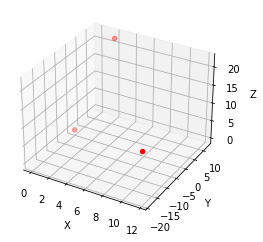

[[-16.37117307 -11.67447393  20.57898482   1.        ]
 [-16.37117307  25.06787221  41.79218825   1.        ]
 [-13.          24.99038106  -0.5          1.        ]]


In [53]:
#Углы поворота 1 камеры отн шаблона###
pi = np.pi
a1=-5*pi/6
b1=(-pi/6)
c1=(3*pi/4)
 
#Коорд перемещения 1 камеры отн шаблона#  
xc1=2 
yc1=12
zc1=22
 
#Внутренние параметры камер####
f=3000 #фокус px
cx=0 #принцип.точка   центр изображения по Ох
cy=0 #принцип.точка   центр изображения по Оy
##############
 
#Вычисление матриц поворота, перемещения и их произведения для каждой
#камеры
 
Rx=np.array([[1,0,0],
    [0, np.cos(a1),-np.sin(a1)],
    [0,np.sin(a1),np.cos(a1)]])
 
Ry=np.array([[np.cos(b1),0,np.sin(b1)],
    [0,1,0],
    [-np.sin(b1),0,np.cos(b1)]])
  
Rz=np.array([[np.cos(c1),-np.sin(c1),0],
    [np.sin(c1),np.cos(c1),0],
    [0,0,1]])
  
T=np.array([[xc1,
   yc1,
   zc1]]).T
 
R=np.dot(Rx.dot(Ry),Rz)

O=np.zeros((1,3));
 
####
C1 = np.zeros((4,4))
C1[:3,:3]=R
C1[:3,3:4] =  T
C1[3,3] = 1.
#C1=[R T;O 1];(Коор. в системе камеры)*С'=(коорд. отн шаблона)    
##матрица внешней калибровки Сс=inv(C)
print(C1)

Cc1 = np.zeros((4,4))
Cc1[:3,:3]=R.T
Cc1[:3,3:4] =  -(R.T.dot(T))
Cc1[3,3] = 1.

#Cc1=[R' -R'*T;O 1];
#(Коор. в системе шаблона)*Сс'=(коорд. отн камеры)
####
 
 
 
 
 
##Матрица внутренней калибровки##
K=np.array([[f, 0, cx],
   [0, f, cy],
   [0, 0 , 1]])
#############
 
##Матрицы проекции###
I = np.hstack((np.eye(3),np.zeros((3,1))) )
Pr1=np.dot(K.dot(I),Cc1)
#########
 
#Проверка полученных матриц#
 
# C2=[0 0 0 1]*C1'
############
 
#ШАБЛОН - МИРОВАЯ СИСТЕМА КООРДИНАТ
 
###########
 
#axes = mplot3d.Axes3D(figure, auto_add_to_figure=False)

#Построение#

 
#положение камер отн шаблона#
Oc_ = np.array([[xc1],[yc1],[zc1],[1]])
Oc_0 = np.array([[0, 0, 0, 1]]).T 
print('..',np.dot(Cc1,Oc_)) 
Oc=np.dot(Cc1,Oc_0)
print(Cc1)#первод из мировой  в видовую
#перевод из видовой в мировую
vertices_ = np.hstack((Oc_,Oc,Oc_0))
print(vertices_ )
plot_verticles(vertices_[:3,:].T, isosurf = False, filename = None) 
 
#орты базиса мировой системы координат
OrtX=np.array([[30, 0, 0, 1],[0, 30, 0, 1],[0, 0, 30, 1]])
#орты базиса камеры отн мировой системы координат
OrtXc=OrtX.dot(C1.T)
print(OrtXc) 
 
#plt.plot3D([OrtXc(1) Oc(1)],[OrtXc(2) Oc(2)],[OrtXc(3) Oc(3)],'r','LineWidth',3)
#plt.plot3D([OrtYc(1) Oc(1)],[OrtYc(2) Oc(2)],[OrtYc(3) Oc(3)],'g','LineWidth',3)
#plt.plot3D([OrtZc(1) Oc(1)],[OrtZc(2) Oc(2)],[OrtZc(3) Oc(3)],'b','LineWidth',3)
 

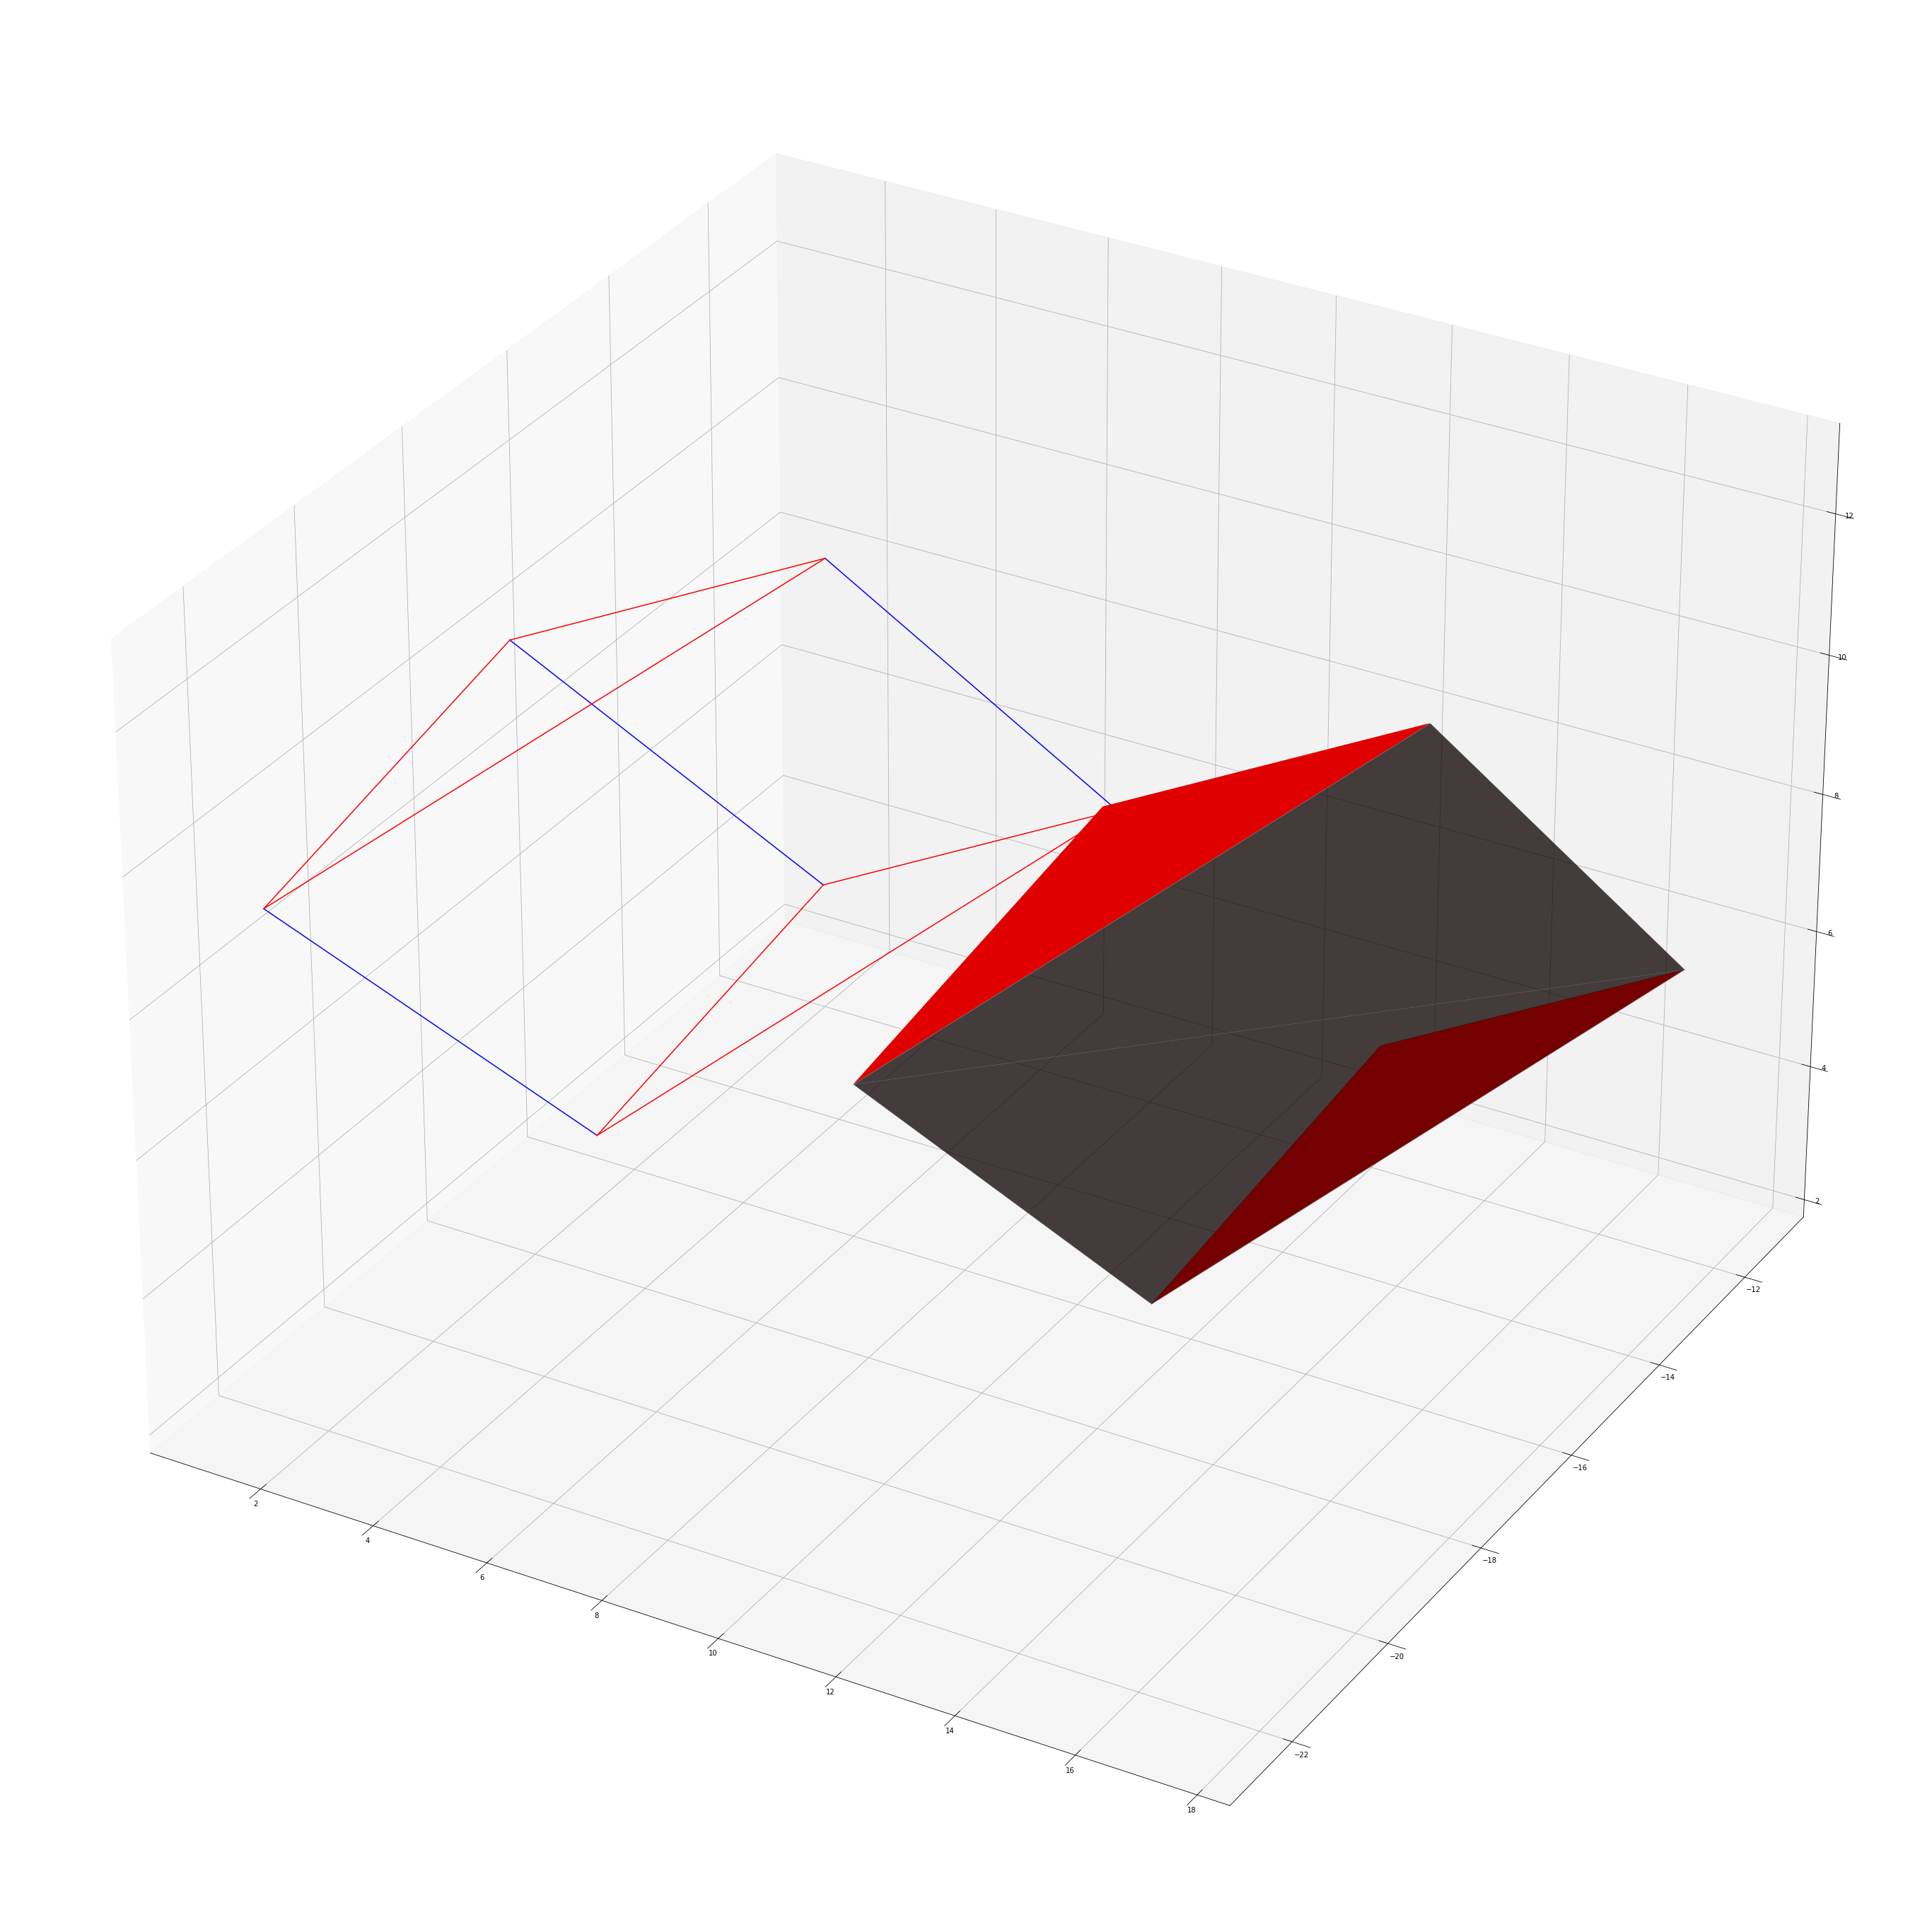

In [55]:
from matplotlib.colors import LightSource
P1 = [10, 5, 0, 1]
P2 = [6, 6,  0,1]
P3 = [2, 4 ,0,1]
fig = plt.figure(figsize=(50,50))
ax = plt.axes(projection='3d')
P=np.array([P1,P2,P3])
T=np.array([[1, 0, 0, 0],[0 ,1 ,0, 0],[0, 0, 1, 0],[  0, 0,  10,1]])
P_new = np.dot(P,T)
cmap = LinearSegmentedColormap.from_list ('gray', ['b', 'k'], 256) #градиентная палитра цвета 256 level
P = np.dot(P,Cc1.T)
P_new=np.dot(P_new,Cc1.T)
Pr=P
L=[]
for i in range(3):
    ax.plot3D([P[i,0], P_new[i,0]],[P[i,1],P_new[i,1]],[P[i,2],P_new[i,2]],'b')
    L+=[P[i,:]]
    L+=[P_new[i,:]]
L+=[P[0,:]]
L+=[P_new[0,:]]
for i in range(2):
    ax.plot3D([P[i,0], P[i+1,0]],[P[i,1],P[i+1,1]],[P[i,2],P[i+1,2]],'r')
    ax.plot3D([P_new[i,0], P_new[i+1,0]],[P_new[i,1],P_new[i+1,1]],[P_new[i,2],P_new[i+1,2]],'r')


ax.plot3D([P[2,0], P[0,0]],[P[2,1],P[0,1]],[P[2,2],P[0,2]],'r')
ax.plot3D([P_new[2,0], P_new[0,0]],[P_new[2,1],P_new[0,1]],[P_new[2,2],P_new[0,2]],'r')

Pr2=np.array(L)

my_cmap = plt.get_cmap('hot')
for i in range(6):
    
    ax.plot_trisurf(Pr2[i:(i+3),0]+10,Pr2[i:(i+3),1],Pr2[i:(i+3),2],cmap = my_cmap ,  linewidth = 0.2,
                         antialiased = True, edgecolor = 'grey', shade=True ,alpha=0.5)# цвет+прозрачность alpha = 1 (не прозрачно)
ax.plot_trisurf(P[:,0]+10,P[:,1],P[:,2],color='r', alpha=1)
ax.plot_trisurf(P_new[:,0]+10,P_new[:,1],P_new[:,2],color='r', alpha=1 )

plt.show()

In [25]:
import matplotlib.pyplot as plt

# !!!
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm


In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Make data
def my_spher(N = 10, R=10):
  # parametric
  u = np.linspace(0, 2 * np.pi, N)
  v = np.linspace(0, np.pi, N)
  x = R * np.outer(np.cos(u), np.sin(v))
  y = R * np.outer(np.sin(u), np.sin(v))
  z = R * np.outer(np.ones(np.size(u)), np.cos(v))
  return x,y,z

Прозрачность

[[ 0.00000000e+00  3.42020143e+00  6.42787610e+00  8.66025404e+00
   9.84807753e+00  9.84807753e+00  8.66025404e+00  6.42787610e+00
   3.42020143e+00  1.22464680e-15]
 [ 0.00000000e+00  2.62002630e+00  4.92403877e+00  6.63413948e+00
   7.54406507e+00  7.54406507e+00  6.63413948e+00  4.92403877e+00
   2.62002630e+00  9.38133875e-16]
 [ 0.00000000e+00  5.93911746e-01  1.11618897e+00  1.50383733e+00
   1.71010072e+00  1.71010072e+00  1.50383733e+00  1.11618897e+00
   5.93911746e-01  2.12657685e-16]
 [-0.00000000e+00 -1.71010072e+00 -3.21393805e+00 -4.33012702e+00
  -4.92403877e+00 -4.92403877e+00 -4.33012702e+00 -3.21393805e+00
  -1.71010072e+00 -6.12323400e-16]
 [-0.00000000e+00 -3.21393805e+00 -6.04022774e+00 -8.13797681e+00
  -9.25416578e+00 -9.25416578e+00 -8.13797681e+00 -6.04022774e+00
  -3.21393805e+00 -1.15079156e-15]
 [-0.00000000e+00 -3.21393805e+00 -6.04022774e+00 -8.13797681e+00
  -9.25416578e+00 -9.25416578e+00 -8.13797681e+00 -6.04022774e+00
  -3.21393805e+00 -1.15079156e-15

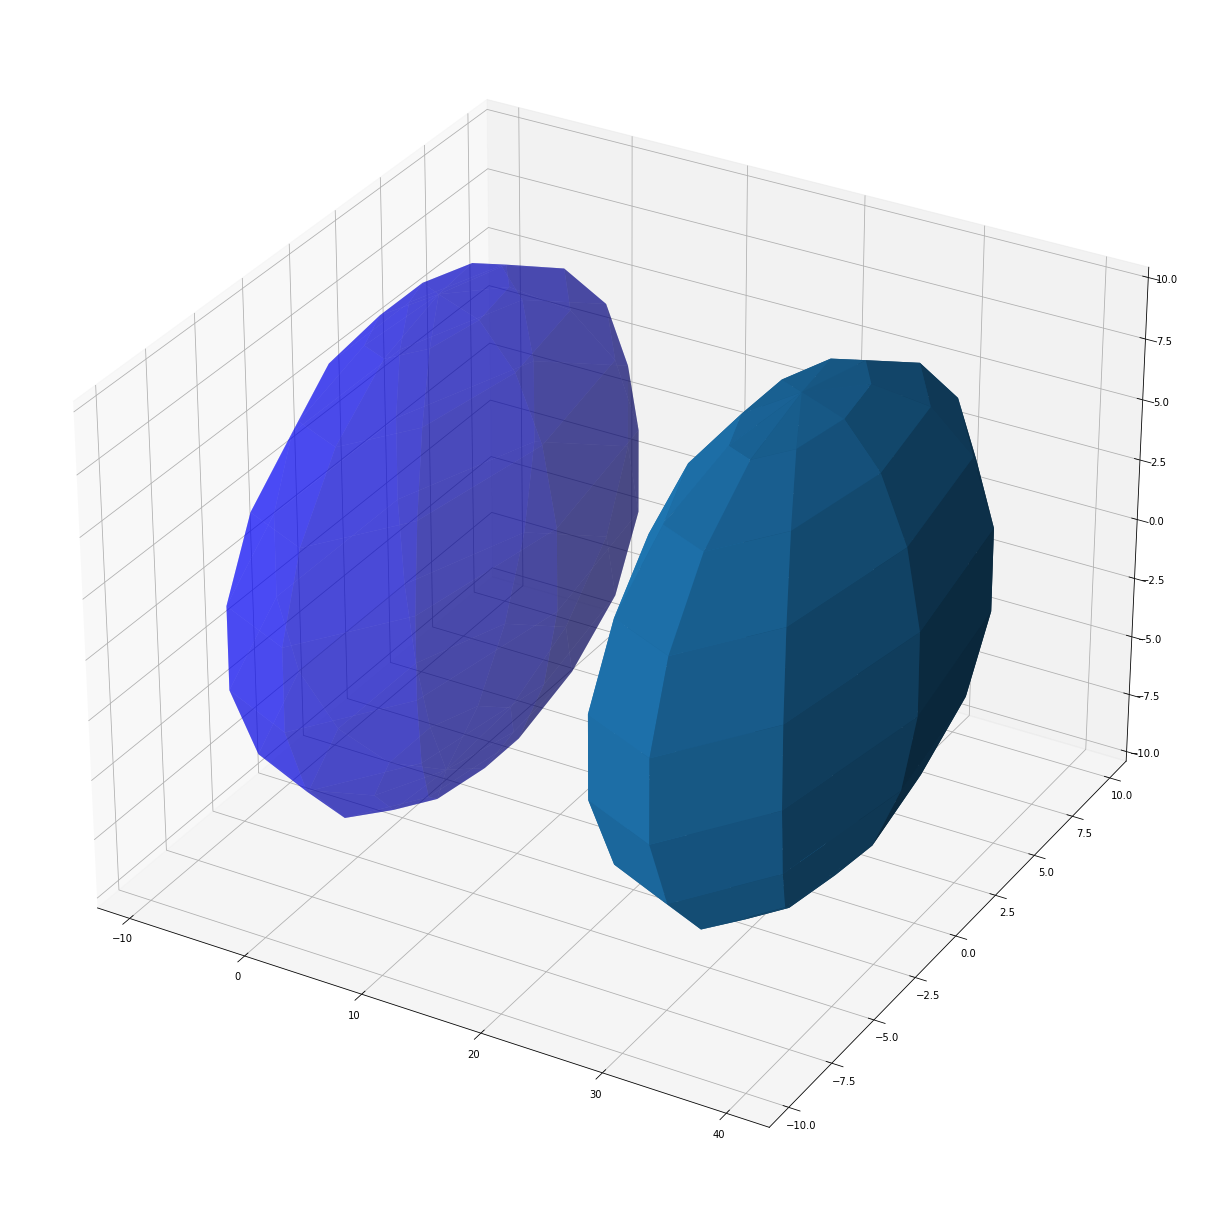

In [56]:

x,y,z = my_spher()  
print(x)
fig = plt.figure(figsize = (22,22))
axes = fig.add_subplot(projection='3d')


# Plot the surface
axes.plot_surface(x+30, y, z, alpha=1, )# цвет+прозрачность alpha = 1 (не прозрачно)

axes.plot_surface(x, y, z, color='b', alpha = 0.45)# цвет+прозрачность alpha = 0.45
print (z)

plt.show()

Ракурс

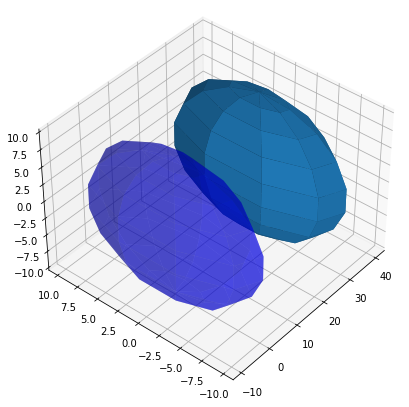

In [28]:


x,y,z = my_spher()  
fig = plt.figure(figsize = (16,7))
axes = fig.add_subplot(projection='3d')


# Plot the surface
axes.plot_surface(x+30, y, z)# цвет+прозрачность alpha = 1 (не прозрачно)

axes.plot_surface(x, y, z, color='b', alpha = 0.45)# цвет+прозрачность alpha = 0.45
axes.view_init( 40, -140) # точка зрения

plt.show()

Сложный цвет

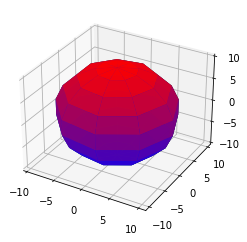

In [29]:
x,y,z = my_spher()  
fig = plt.figure()
axes = fig.add_subplot(projection='3d')


# Plot the surface
axes.plot_surface(x, y, z)

cmap = LinearSegmentedColormap.from_list ('red_blue', ['b', 'r'], 256) #градиентная палитра цвета 256 level
axes.plot_surface(x, y, z, color='#11aa55', cmap=cmap, alpha = 0.9) # цвет градиент, но почти нет прозрачности alpha = 0.9


plt.show()

Освещение

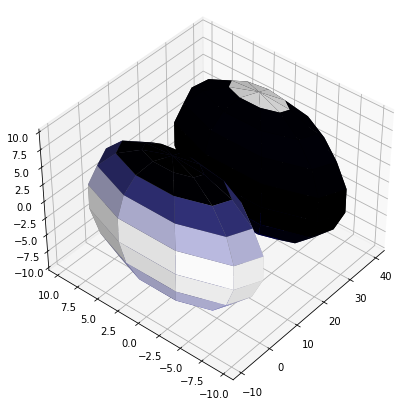

In [30]:
import numpy as np
from matplotlib import cbook
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource




x,y,z = my_spher()  
fig = plt.figure(figsize = (16,7))
axes = fig.add_subplot(projection='3d')


cmap = LinearSegmentedColormap.from_list ('gray', ['b', 'k'], 256) #градиентная палитра цвета 256 level

# 
if 1: #  свет
  ls = LightSource(azdeg=160, altdeg=-145)
  rgb = ls.shade(z,cmap =cmap,  vert_exag=1, blend_mode='hsv') # hsv
  axes.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                           linewidth=0, antialiased=True, shade=True)
  # второй вариант для сравнения
  ls = LightSource(azdeg=60, altdeg=45)
  rgb = ls.shade( z,cmap = cmap, vert_exag=10, blend_mode='hsv')
  axes.plot_surface(x+30, y, z,rstride=1, cstride=1, facecolors=rgb,
                           linewidth=0, antialiased=True, shade=True)# 
else:
  axes.plot_surface(x+30, y, z)
  axes.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cmap ,
                           antialiased=False, shade=False)
axes.view_init( 40, -140) # точка зрения
plt.show()

In [31]:
x.shape

(10, 10)

Движение

(100, 4)


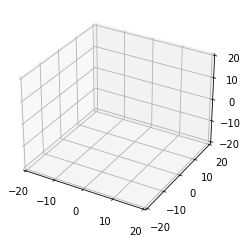

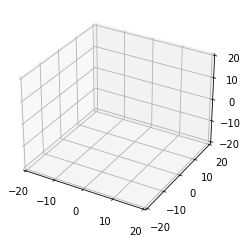

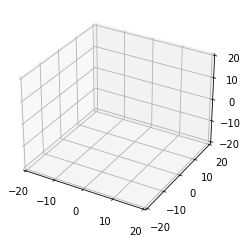

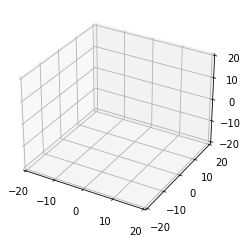

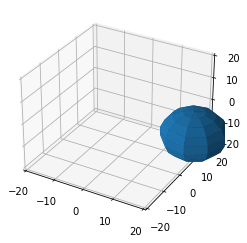

In [37]:
import time 

# Make the X, Y meshgrid.
X,Y,Z = my_spher()



# Begin plotting.
wframe = None
tstart = time.time()
T = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[5,0,0,1]])
XYZ = np.hstack((X.reshape(-1,1),Y.reshape(-1,1),Z.reshape(-1,1),np.ones((X.size,1))))
print(XYZ.shape)
for phi in range(5):#np.linspace(0, 180. / np.pi, 100):

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)
    ax.set_zlim(-20, 20)
    XYZ = XYZ.dot(T)
    # If a line collection is already remove it before drawing.
    if wframe:
        wframe.remove()
    # Generate data.

    # Plot the new wireframe and pause briefly before continuing.
    
    wframe = ax.plot_surface(XYZ[:,0].reshape(-1,10), XYZ[:,1].reshape(-1,10), XYZ[:,2].reshape(-1,10))
    #plt.pause(.001)
    #plt.show()
    plt.savefig('filename'+str(phi)+'.png')